# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [203]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [204]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [205]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [206]:
# Scrape the website
html = browser.html
# Create a Beautiful Soup Object
html_soup = soup(html, 'html.parser')

In [207]:
# Extract all rows of data

# mars_table = html_soup.find('table', class_='table') or

mars_table = html_soup.select('table.table')
# mars_table

In [208]:
# Create a DataFrame from the data
df = pd.read_html(str(mars_table))[0]
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [209]:
# Store the table
# Create an empty list
mars_temp_data = []

# Access the first table in the list
table = mars_table[0]

# Find all rows in the table
rows = table.find_all('tr')

# Loop through each row
for row in rows:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    mars_temp_data.append(cols)
    
mars_temp_data

[[],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-7

In [210]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

# Define the column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create the DataFrame
mars_temp_df = pd.DataFrame(mars_temp_data, columns=column_names)


In [211]:
# Confirm DataFrame was created successfully
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,None,None,None,None,None,None,None
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [212]:
# Examine data type of each column
# use df.types
mars_temp_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [213]:
# Change data types for data analysis
mars_temp_df['min_temp'] = mars_temp_df['min_temp'].astype(float)


In [214]:
# Replace the empty cells with 0
mars_temp_df[['id', 'sol', 'ls']] = mars_temp_df[['id', 'sol', 'ls']].fillna(0)


In [215]:
# Change data types
mars_temp_df[['id', 'sol', 'ls']] = mars_temp_df[['id', 'sol', 'ls']].astype(int)

In [216]:
# Confirm type changes were successful by examining data types again
mars_temp_df.dtypes


id                    int32
terrestrial_date     object
sol                   int32
ls                    int32
month                object
min_temp            float64
pressure             object
dtype: object

In [217]:
# To check the quality of the data
mars_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1868 non-null   int32  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1868 non-null   int32  
 3   ls                1868 non-null   int32  
 4   month             1867 non-null   object 
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   object 
dtypes: float64(1), int32(3), object(3)
memory usage: 80.4+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [218]:
# 1. How many months are there on Mars?

# Use the nunique() method on the 'month' column of the df, mars_temp_df:
month_count = mars_temp_df['month'].nunique()
# month_count
print("There are", month_count, "months on Mars.")

There are 12 months on Mars.


In [219]:
# 2. How many Martian days' worth of data are there?

# sol = Martian day or the duration of the solar day on Mars
# Use the count() method on the 'sol' column of the df, mars_temp_df:
sol_count = mars_temp_df['sol'].count()
# # sol_count
print("There are", sol_count, "Martian days' worth of data.")


There are 1868 Martian days' worth of data.


In [220]:
# 3. What is the average low temperature by month?

# Use the groupby() and mean() method on the 'month' and 'min_temp' columns of the df,mars_temp_df
mars_temp_df['min_temp'] = pd.to_numeric(mars_temp_df['min_temp'], errors='coerce')
monthly_avg_temp = mars_temp_df.groupby('month')['min_temp'].mean()
monthly_average_temp = monthly_avg_temp.sort_values(ascending=False)

print("The average low temperature by month:\n \n", monthly_average_temp)

The average low temperature by month:
 
 month
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
7    -72.281690
12   -74.451807
6    -75.299320
1    -77.160920
5    -79.308725
2    -79.932584
4    -82.747423
3    -83.307292
Name: min_temp, dtype: float64


<IPython.core.display.Javascript object>


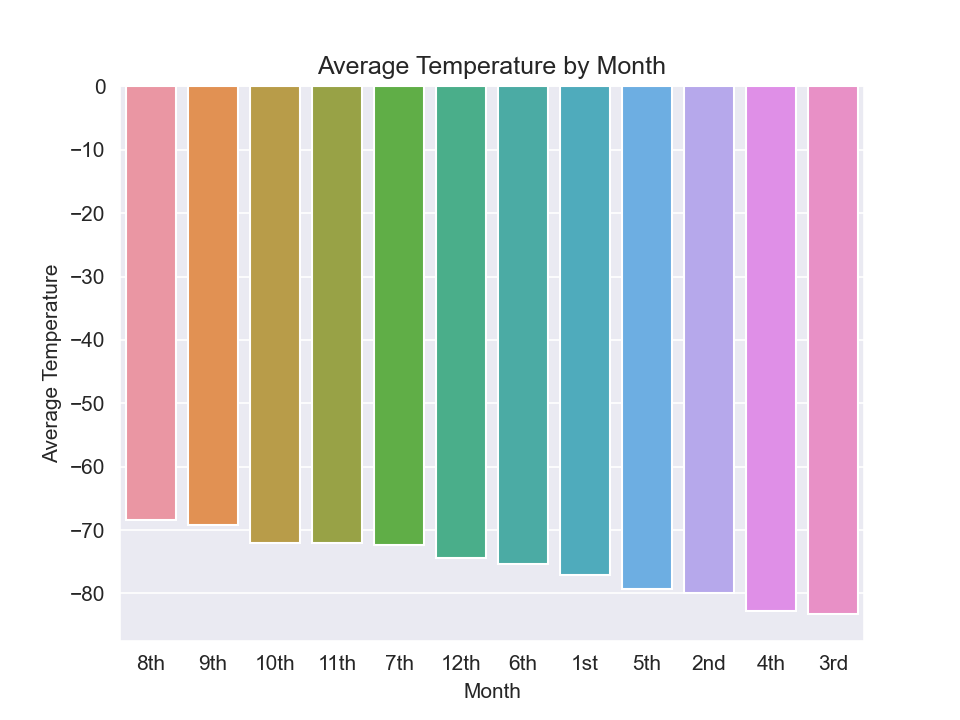

In [221]:
# Plot the average temperature by month
import seaborn as sns
%matplotlib notebook

month = ['8th', '9th', '10th', '11th', '7th', '12th', '6th', '1st', '5th', '2nd', '4th', '3rd']
sns.barplot(x=monthly_average_temp.index, y=monthly_average_temp.values)
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.title('Average Temperature by Month')
plt.xticks(range(12), month)
plt.show()




In [222]:
# Identify the coldest and hottest months in Curiosity's location

# Use the idxmin() and idxmax() methods on the monthly_average_temp variable
coldest_month = monthly_average_temp.idxmin()
hottest_month = monthly_average_temp.idxmax()

print("The coldest month is:", coldest_month)
print("The hottest month is:", hottest_month)

The coldest month is: 3
The hottest month is: 8


In [223]:
# 4. Average pressure by Martian month
# Use the groupby() and mean() method on the 'month' and 'pressure' columns of the df, mars_temp_df:

mars_temp_df['pressure'] = pd.to_numeric(mars_temp_df['pressure'], errors='coerce')
monthly_avg_pressure = mars_temp_df.groupby('month')['pressure'].mean()
monthly_average_pressure = monthly_avg_pressure.sort_values(ascending=False)

print("The average pressure by month is:\n \n", monthly_average_pressure)


The average pressure by month is:
 
 month
9     913.305970
2     889.455056
10    887.312500
3     877.322917
8     873.829787
1     862.488506
11    857.014493
12    842.156627
4     806.329897
7     795.105634
5     748.557047
6     745.054422
Name: pressure, dtype: float64


<IPython.core.display.Javascript object>


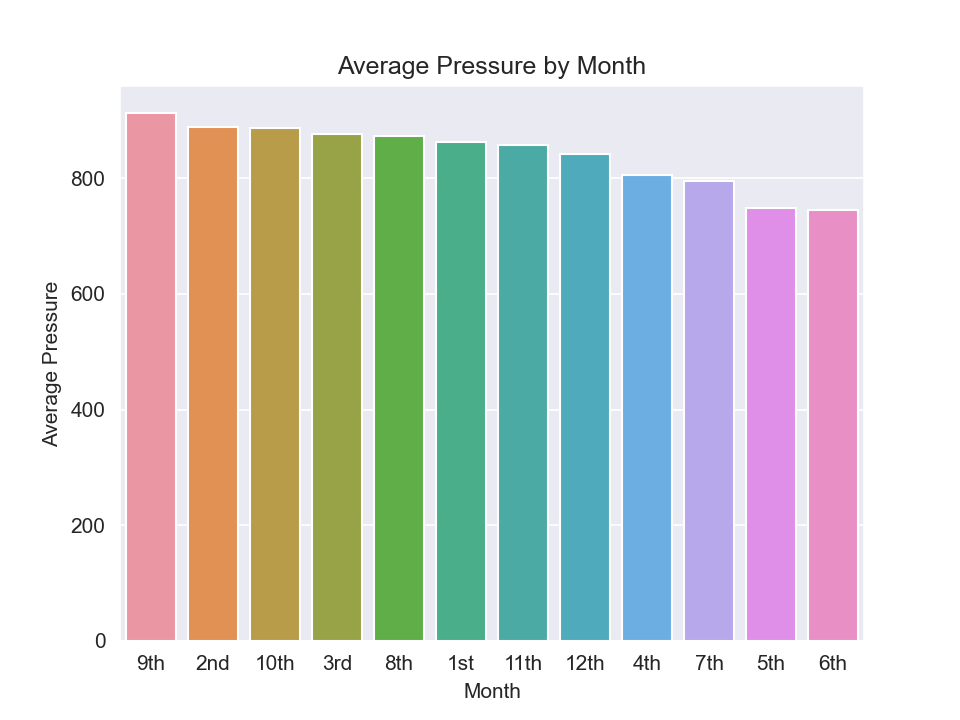

In [224]:
# Plot the average pressure by month

import seaborn as sns
%matplotlib notebook

month = ['9th', '2nd', '10th', '3rd', '8th', '1st', '11th', '12th', '4th', '7th', '5th', '6th']
sns.barplot(x=monthly_average_pressure.index, y=monthly_average_pressure.values)
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure by Month')
plt.xticks(range(12), month)
plt.show()

In [240]:
# 5. How many terrestrial (earth) days are there in a Martian year?
earth_days = mars_temp_df['sol'].max()
print("The terrestrial (earth) days in a Martian year is:", earth_days)

The terrestrial (earth) days in a Martian year is: 1977


In [243]:
Peak2 = 1425
Peak1 = 750
days =  Peak2-Peak1
days 

675

<IPython.core.display.Javascript object>


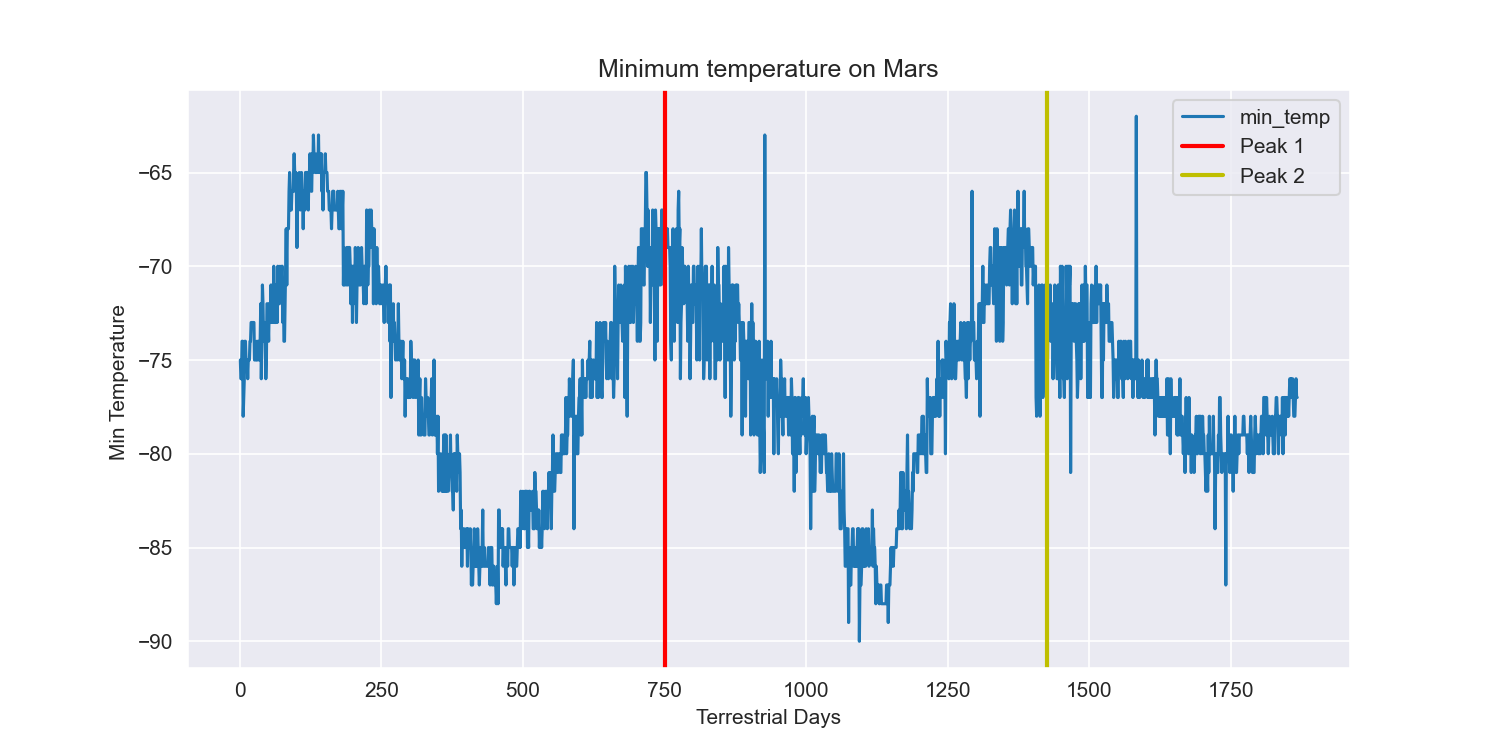

In [232]:
import seaborn as sns
%matplotlib notebook


sns.set_style('darkgrid')
mars_temp_df['min_temp'].plot(figsize=(10,5))
plt.xlabel('Terrestrial Days')
plt.ylabel('Min Temperature ')
plt.grid(True)
plt.title('Minimum temperature on Mars')
plt.axvline(x=750,color='r',linestyle='solid',linewidth=2, label= 'Peak 1')
plt.axvline(x=1425,color='y',linestyle='solid',linewidth=2, label= 'Peak 2')
plt.legend()
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

At ground level the Martian atmosphere has a pressure of 6.518 millibars or 0.095 psi as compared to the Earth's sea level atmospheric pressure of 14.7 psi.(source:https://mars.nasa.gov/MPF/mpf/realtime/mars2.html#:~:text=At%20ground%20level%20the%20Martian,39%20UTC%20Earth%20receive%20time.)
Overall, the Martian atmosphere is not breathable.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

The temperature and the atmospheric pressure on Mars are just few of the problems that need to be solved before human can live on it.

# Step 6: Save the Data
Export the DataFrame to a CSV file.

In [157]:
# Write the data to a CSV
mars_temp_df.to_csv("mars_temperature_data.csv", index=False)

In [193]:
browser.quit()